# Prediction: In what payment tier is the employee?

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
import time

# read dataset
df = pd.read_csv('Employee.csv')

df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


## Data exploration

In [35]:
# Checking for Null values
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

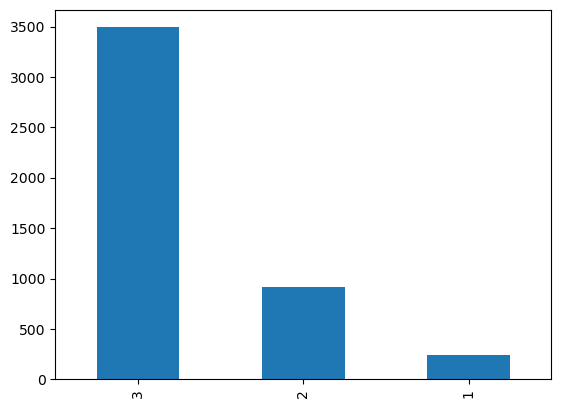

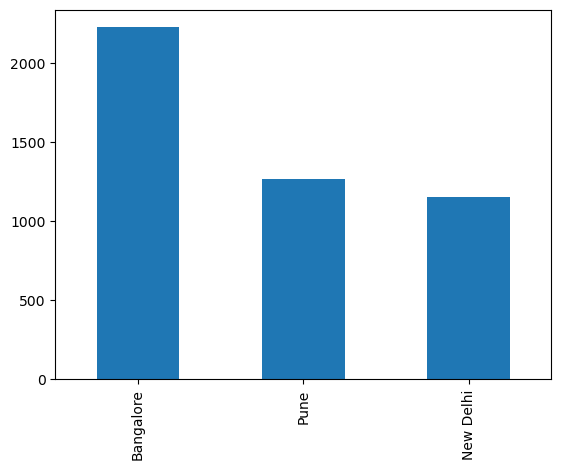

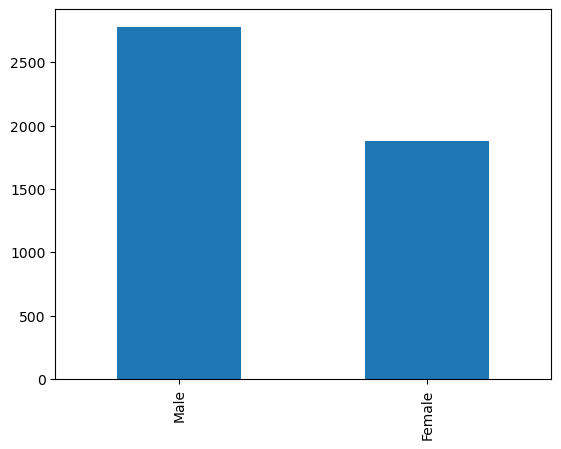

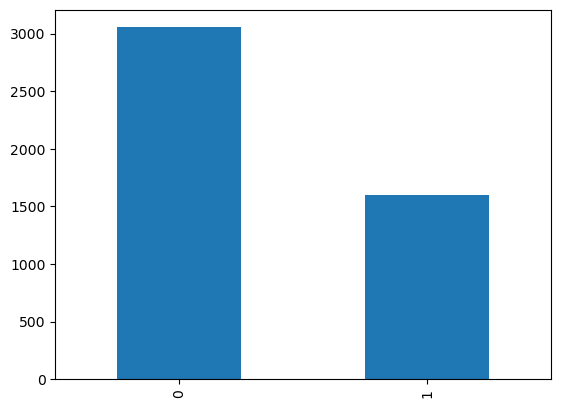

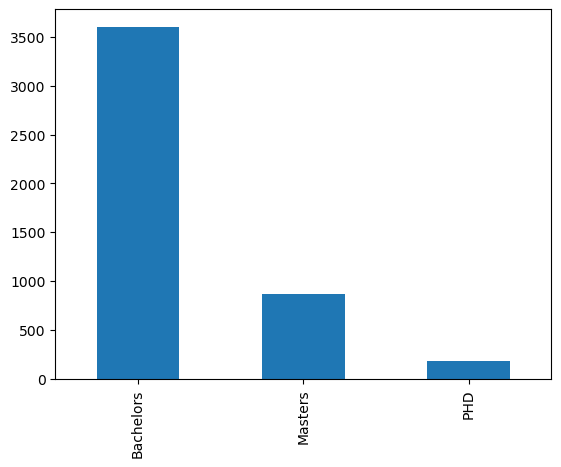

In [36]:
for x in ["PaymentTier", "City", "Gender", "LeaveOrNot", "Education"]:
    df[x].value_counts().plot(kind='bar')
    plt.show()

<AxesSubplot:>

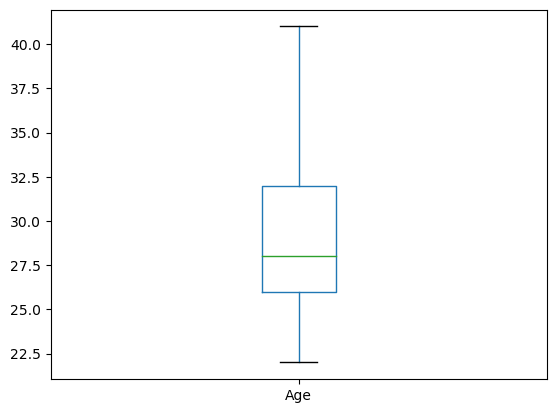

In [37]:
df["Age"].plot(kind='box')

In [38]:
def encode_categorical_columns(input_df, columns_to_encode):
    # Create a copy of the input DataFrame to avoid modifying the original
    encoded_df = input_df.copy()

    # Initialize a LabelEncoder instance
    label_encoder = LabelEncoder()

    # Encode specified columns
    for column in columns_to_encode:
        if column in encoded_df.columns:
            encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

    return encoded_df

columns_to_encode = ["Education", "City", "Gender", "EverBenched"]

# Change categorical to numeric to make data train ready
df_encoded = encode_categorical_columns(df, columns_to_encode)

df_encoded.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


41877

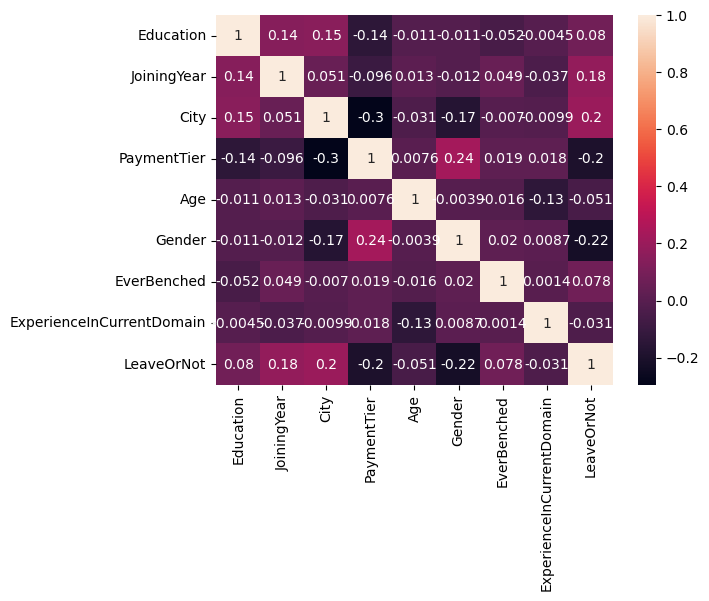

In [39]:
sns.heatmap(df_encoded.corr(), annot=True)
df_encoded.size

Columns with the biggest correlation to Payment tier: City, Gender, Leave or not and education. These are the best contenders as input for the model.

## Input preparation

In [40]:
df_filtered = df_encoded.filter(["PaymentTier", "City", "Gender", "LeaveOrNot", "Education"])

X = df_filtered.iloc[:,1:]

y = df_filtered['PaymentTier']
from tensorflow.keras.utils import to_categorical 
y_cat = to_categorical(y - 1, num_classes=3)

X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat, test_size=0.3, stratify=df_filtered['PaymentTier'], random_state=42)

## Model creation

In [44]:
def plot_history(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    iterations = range(1, len(train_loss) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, train_loss, label='Training Loss')
    plt.plot(iterations, val_loss, label='Validation Loss')
    plt.title('Loss vs. Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch 1/20
92/92 [==============================] - 1s 7ms/step - loss: 0.6174 - accuracy: 0.7663 - val_loss: 0.5660 - val_accuracy: 0.8006
Epoch 2/20
92/92 [==============================] - 0s 3ms/step - loss: 0.5873 - accuracy: 0.7776 - val_loss: 0.5548 - val_accuracy: 0.8098
Epoch 3/20
92/92 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.7868 - val_loss: 0.5550 - val_accuracy: 0.8006
Epoch 4/20
92/92 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.7885 - val_loss: 0.5565 - val_accuracy: 0.7975
Epoch 5/20
92/92 [==============================] - 0s 3ms/step - loss: 0.5801 - accuracy: 0.7854 - val_loss: 0.5686 - val_accuracy: 0.7822
Epoch 6/20
92/92 [==============================] - 0s 3ms/step - loss: 0.5748 - accuracy: 0.7892 - val_loss: 0.5722 - val_accuracy: 0.7761
Epoch 7/20
92/92 [==============================] - 0s 3ms/step - loss: 0.5883 - accuracy: 0.7851 - val_loss: 0.5653 - val_accuracy: 0.7945
Epoch 8/20
92/92 [==

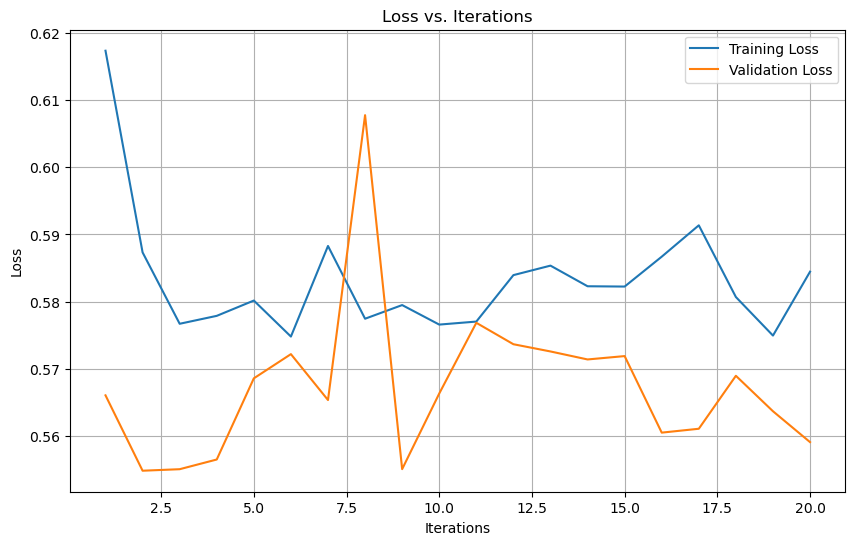

Training time: 6.35 seconds


In [56]:
# create model
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# visualize model architecture
plot_model(model, to_file='employee_model_plot.png', show_shapes=True, show_layer_names=True, 
           show_layer_activations=True, rankdir="LR", dpi=256)

# Start measuring the time
start_time = time.time()

# train model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)
plot_history(history)

# End measuring the time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

In [59]:
# evaluate model
y_pred = model.predict(X_test)
print(f'\n\n{y_pred[:5]}')

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(f'\n\n{y_pred_class[:5]}')

print('\n\nclassification report:')
print(classification_report(y_test_class, y_pred_class))

print('\n\nconfusion matrix:')
confusion_matrix(y_test_class, y_pred_class)

44/44 [==============================] - 0s 2ms/step


[[0.04488571 0.65868396 0.2964303 ]
 [0.02229655 0.02956232 0.94814104]
 [0.0225416  0.01465951 0.9627989 ]
 [0.077762   0.2036709  0.718567  ]
 [0.06742562 0.4853195  0.44725484]]


[1 2 2 2 1]


classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.54      0.49      0.51       275
           2       0.83      0.91      0.87      1048

    accuracy                           0.78      1396
   macro avg       0.46      0.47      0.46      1396
weighted avg       0.73      0.78      0.75      1396



confusion matrix:


C:\Users\Justin\anaconda3\envs\ml2_ws1_ws2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Justin\anaconda3\envs\ml2_ws1_ws2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Justin\anaconda3\envs\ml2_ws1_ws2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  0,  21,  52],
       [  0, 135, 140],
       [  0,  95, 953]], dtype=int64)

## Conclusion

F-Score for Payment tier 3 seems the be the best, the model never seems to predict tier 1 and tier 2 is pretty bad as well. This is the result of data imbalance, most samples are tier 3 and very little are tier 1. After resampling the data, the F-Score for Tier 1 increases but it's still really bad.

Conclusion: With the following settings, the model is very reliable at predicting tier 3 employees but is very bad at predicting tier 1 and 2.

## Workshop 4: Benchmarks

### Criteria

- F1-score
- Train time

In [54]:
# Start measuring the time
start_time = time.time()

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# End measuring the time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

# Predict using Decision Tree
y_pred_decision_tree = decision_tree.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred_decision_tree, axis=1)

print('\n\nclassification report:')
print(classification_report(y_test_class, y_pred_class))

Training time: 0.00 seconds


classification report:
              precision    recall  f1-score   support

           0       0.14      0.12      0.13        73
           1       0.67      0.42      0.51       275
           2       0.85      0.94      0.89      1048

    accuracy                           0.79      1396
   macro avg       0.55      0.49      0.51      1396
weighted avg       0.77      0.79      0.78      1396



In [55]:
# Start measuring the time
start_time = time.time()

# Create a Random Forest classifier
decision_tree = RandomForestClassifier(n_estimators=100)
decision_tree.fit(X_train, y_train)

# End measuring the time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

# Predict using Decision Tree
y_pred_decision_tree = decision_tree.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred_decision_tree, axis=1)

print('\n\nclassification report:')
print(classification_report(y_test_class, y_pred_class))

Training time: 0.31 seconds


classification report:
              precision    recall  f1-score   support

           0       0.12      0.10      0.11        73
           1       0.67      0.42      0.51       275
           2       0.84      0.94      0.89      1048

    accuracy                           0.79      1396
   macro avg       0.54      0.48      0.50      1396
weighted avg       0.77      0.79      0.77      1396



## Conclusion

The F-Score on average of the DT and RF seems to be better than that of the Neuron network. Despite that, they are still bad, but this is because the data is very skewed. We could duplicate samples of tier 1 and 2 to make them equaly common as tier 3 but this will cause massive overfitting. Cutting down tier 3 samples would result in having to little samples to train with (underfitting). The conclusion is that we don't have enough data to make a reliable model.